# Exploratory Data Analysis (EDA)
Exploratory berasal dari kata explore, yaitu suatu proses dalam memahami suatu data dengan cara mengeksplorasi tiap detail dari data yang dimiliki untuk mendapatkan suatu informasi. 

EDA dapat diibaratkan satu kesatuan proses memahami detail data yang kita miliki. Langkah langkah dalam melakukan EDA antara satu data adengan data lainnya tidak lah sama tergantung dengan kondisi data yang kita miliki. Poin yang penting dalam EDA sebenarnya telah kita pelajari pada meeting sebelumnya, antara lain :
1. Data Preprocessing
    - Data Cleaning
    - Data Manipulating
    - Data Wrangling
2. Descriptive Statistics
3. Data Visualization
4. Insight & Story Telling

# Data Preprocessing 

#### Membaca data

| Symbol | Meaning |
|----|---|
|pd.read_csv(filename) |	From a CSV file
|pd.read_table(filename) |	From a delimited text file (like TSV)
|pd.read_excel(filename) |	From an Excel file
|pd.read_sql(query, connection_object) |	Read from a SQL table/database
|pd.read_json(json_string) |	Read from a JSON formatted string, URL or file.
|pd.read_html(url) |	Parses an html URL, string or file and extracts tables to a list of dataframes
|pd.read_clipboard()	| Takes the contents of your clipboard and passes it to read_table()
|pd.DataFrame(dict) |	From a dict, keys for columns names, values for data as lists

In [1]:
# Mengakses link ke google drive
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# Mendefinisikan data path
path_data = '/content/gdrive/My Drive/Summer Class/meet 10/'

In [ ]:
# Membaca directory
import os
os.listdir(path_data)

['customer.csv',
 'online_retail_II.xlsx',
 'product_clean.csv',
 'product.csv',
 'sales reciepts.csv']

In [ ]:
# Import Packages
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Membaca dataset
df_cust = pd.read_csv(path_data + 'customer.csv')
df_trx = pd.read_csv(path_data + 'sales reciepts.csv')
df_prod = pd.read_csv(path_data + 'product.csv')

#### Menampilkan variabel numerik dan kategori

In [ ]:
# Menampilkan kolom pada data customer
df_cust.columns

Index(['customer_id', 'home_store', 'customer_first-name', 'customer_email',
       'customer_since', 'loyalty_card_number', 'birthdate', 'gender',
       'birth_year'],
      dtype='object')

In [ ]:
# Menampilkan kolom pada data produk
df_prod.columns

Index(['product_id', 'product_group', 'product_category', 'product_type',
       'product', 'product_description', 'unit_of_measure',
       'current_wholesale_price', 'current_retail_price', 'tax_exempt_yn',
       'promo_yn', 'new_product_yn'],
      dtype='object')

In [ ]:
# Menampilkan kolom pada data transaksi
df_trx.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'sales_outlet_id', 'staff_id', 'customer_id', 'instore_yn', 'order',
       'line_item_id', 'product_id', 'quantity', 'line_item_amount',
       'unit_price', 'promo_item_yn'],
      dtype='object')

In [ ]:
# Menampilkan 5 data teratas pada data transaksi (default)
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [ ]:
# Menampilkan 5 data teratas pada data produk (default)
df_prod.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [ ]:
# Menampilkan 10 data teratas pada data transaksi (1st:10row)
df_trx.head(10)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
5,39,2019-04-01,18:54:46,3,17,664,Y,1,1,32,1,3.00,3.00,N
6,50,2019-04-01,13:03:49,3,12,316,N,1,1,49,2,6.00,3.00,N
7,53,2019-04-01,11:21:14,3,12,38,N,1,1,60,1,3.75,3.75,N
8,59,2019-04-01,19:30:55,3,12,370,Y,1,1,51,2,6.00,3.00,N
9,62,2019-04-01,12:01:00,3,12,180,Y,1,1,49,2,6.00,3.00,N


## Data Cleaning

### Check tipe data

> note :
- kategorik - object,
- string - object, 
- numerik.diskrit - integer,
- numerik.kontinu - float, 
- date - datetime

In [ ]:
# Tipe data customer
df_cust.dtypes

customer_id             int64
home_store              int64
customer_first-name    object
customer_email         object
customer_since         object
loyalty_card_number    object
birthdate              object
gender                 object
birth_year              int64
dtype: object

In [ ]:
# Tipe data produk
df_prod.dtypes

product_id                   int64
product_group               object
product_category            object
product_type                object
product                     object
product_description         object
unit_of_measure             object
current_wholesale_price    float64
current_retail_price        object
tax_exempt_yn               object
promo_yn                    object
new_product_yn              object
dtype: object

In [ ]:
# Tipe data transaksi
df_trx.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object

### Change data types

#### Data customer
Pada data customers (df_cust), kolom customer_id, birth_year, dan home_store masih bertipe data integer padahal kolom-kolom tersebut merupakan suatu object/kategori. Selain itu, customer_since dan birthdate merupakan tanggal jadi harus bertipe date/datetime.


In [ ]:
# Mengubah int menjadi string_one by one
df_cust['customer_id'] = df_cust['customer_id'].astype(str)
df_cust['birth_year'] = df_cust['birth_year'].astype(str)
df_cust['home_store'] = df_cust['home_store'].astype(str)


In [ ]:
# Mengubah string menjadi datetime_looping
change_columns_cust = ['customer_since','birthdate']
for cc in change_columns_cust :
  df_cust[cc] = pd.to_datetime(df_cust[cc])

In [ ]:
# Cek tipe data customer
df_cust.dtypes

customer_id                    object
home_store                     object
customer_first-name            object
customer_email                 object
customer_since         datetime64[ns]
loyalty_card_number            object
birthdate              datetime64[ns]
gender                         object
birth_year                     object
dtype: object

#### Data product
Pada data product, product_id seharusnya bertipe string/object karena tidak bertujuan untuk agregasi. 

In [ ]:
# Mengubah int menjadi str
df_prod['product_id'] = df_prod['product_id'].astype(str)

In [ ]:
# Cek tipe data
df_prod.dtypes

product_id                  object
product_group               object
product_category            object
product_type                object
product                     object
product_description         object
unit_of_measure             object
current_wholesale_price    float64
current_retail_price        object
tax_exempt_yn               object
promo_yn                    object
new_product_yn              object
dtype: object

In [ ]:
df_prod.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


> variabel current_retail_price masih terdapat simbol dollar ($) yang menyebabkan data bertipe object sehingga tidak bisa dilakukan agregasi seperti sum(), mean(), min(), max(), dan lainnya oleh karena itu perlu dilakukan data wrangling (pembahasan di bawah)

#### Data transaksi
Pada data transaksi, semua kolom ID seperti transaction_id,sales_outlet_id,staff_id,customer_id,product_id,line_item_id seharusnya bertipe object. Selain itu transaction_date dan transaction_time seharusnya bertipe datetime.

In [ ]:
# Mengubah integer menjadi string
change_columns_trx = ['transaction_id','sales_outlet_id','staff_id','customer_id','product_id','line_item_id']
for cc in change_columns_trx :
  df_trx[cc] = df_trx[cc].astype(str)

In [ ]:
# Mengubah string menjadi datetime
change_columns_trx = ['transaction_date','transaction_time']
for cc in change_columns_trx :
  df_trx[cc] = pd.to_datetime(df_trx[cc])

In [ ]:
# Cek Tipe Data
df_trx.dtypes

transaction_id              object
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
sales_outlet_id             object
staff_id                    object
customer_id                 object
instore_yn                  object
order                        int64
line_item_id                object
product_id                  object
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn               object
dtype: object

In [ ]:
df_trx.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,2021-07-18 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,2021-07-18 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,2021-07-18 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,2021-07-18 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,2021-07-18 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


### Check Missing Value

In [ ]:
# Data customer
# df_cust.isnull().sum()
df_cust.isnull().any()

customer_id            False
home_store             False
customer_first-name    False
customer_email         False
customer_since         False
loyalty_card_number    False
birthdate              False
gender                 False
birth_year             False
dtype: bool

In [ ]:
# Data produk
df_prod.isnull().any()

product_id                 False
product_group              False
product_category           False
product_type               False
product                    False
product_description        False
unit_of_measure            False
current_wholesale_price    False
current_retail_price       False
tax_exempt_yn              False
promo_yn                   False
new_product_yn             False
dtype: bool

In [ ]:
# Data transaksi
df_trx.isnull().any()

transaction_id      False
transaction_date    False
transaction_time    False
sales_outlet_id     False
staff_id            False
customer_id         False
instore_yn          False
order               False
line_item_id        False
product_id          False
quantity            False
line_item_amount    False
unit_price          False
promo_item_yn       False
dtype: bool

### Check Duplicate

In [ ]:
# Cek data duplicate dari df_cust
df_cust[df_cust.duplicated(keep=False)]

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year


In [ ]:
# Cek data duplicate dari df_prod
df_prod[df_prod.duplicated(keep=False)]

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn


In [ ]:
# Cek data duplicate dari df_trx
df_trx[df_trx.duplicated(keep=False)]

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn


> transaction_id yang berulang pada data df_trx bukan berarti data tersebut merupakan data duplikasi tetapi disebabkan oleh setiap transaksi dapat memiliki lebih dari 1 produk (product_id)

## Data Wragling

In [ ]:
# Cek data Product (df_prod)
df_prod.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [ ]:
# Menghilangkan simbol dolar ($) pada data produk (df_prod), mengubah tipe data menjadi float, dan menambahkan kolom baru 'current_retail_price_value'
df_prod['current_retail_price_value'] = df_prod['current_retail_price'].apply(lambda x: float(x[1:]))
df_prod.dtypes

product_id                     object
product_group                  object
product_category               object
product_type                   object
product                        object
product_description            object
unit_of_measure                object
current_wholesale_price       float64
current_retail_price           object
tax_exempt_yn                  object
promo_yn                       object
new_product_yn                 object
current_retail_price_value    float64
dtype: object

In [ ]:
# Cek kembali apakah sudah terbenbentuk kolom baru dengan current_retail_price tanpa simbol
df_prod.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N,14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N,20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N,15.00


# Exporting Data

| Symbol | Meaning |
|----|---|
|df.to_csv(filename) |	Write to a CSV file
|df.to_excel(filename) |	Write to an Excel file
|df.to_sql(table_name, connection_object) |	Write to a SQL table
|df.to_json(filename) |	Write to a file in JSON format

In [ ]:
# Menyimpan data transaksi, produk, dan customer yang sudah bersih
df_cust.to_csv(path_data + "customer_clean.csv")
df_prod.to_csv(path_data + "product_clean.csv")
df_trx.to_csv(path_data + "transaction_clean.csv")

# EDA - Start The Analysis

Statistik deskriptif tentang mendeskripsikan dan menyederhanakan suatu data. Dalam statistik deskriptif menggunakan dua pendekatan :

1. Pendekatan kuantitatif dengan mendeskripsikan dan membuat summary data numerik.
2. Pendekatan visual dengan mengilustrasikan data menggunakan chart, plot, histogram, dan visual grafis lainnya.

Tentukan Goal dalam analysis apakah:
1. Based on customer? -  latihan
2. Inventory/Product? -  capstone project

### Problem Statement

Review Materi Basic Statistics Essentials
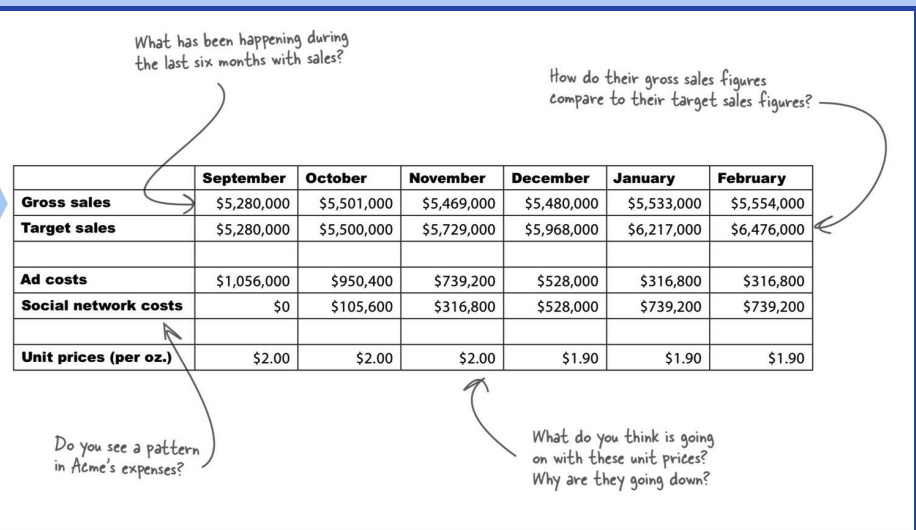

Poin terpenting dalam EDA yaitu curiosity atau rasa ingin tau yang tinggi. Sehingga melakukan list down pertanyaan akan mempermudah proses EDA. 

5 Pertanyaan yang ingin diketahui:
Customer Profiling
1. Berapakah rata rata umur dari customer?
2. Berapakah rata rata lama berlangganan (Length of stay) dari customer?
3. Berapakah proporsi gender dari customer?


Transaksi per customer
4. Cek range tanggal transaksi, tampilkan table jumlah transaksi harian, lalu pada tanggal berapa transaksi terbanyak?
5. Berapakah Value transaksi / unit price customer berdasarkan (min, max, avg, std)?




1. Berapakah rata rata umur dari customer? 

In [ ]:
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [ ]:
#Langkah1.Extract kolom birth_date ke dalam bulan atau tahun
df_cust['day_umur'] = (dt.now() - df_cust['birthdate']).dt.days

In [ ]:
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,day_umur
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,25983
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,25921
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,25859
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,25797
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,25735


In [ ]:
#Langkah2.Penambahan kolom baru (umur)
df_cust['umur']=df_cust['day_umur']/365
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,day_umur,umur
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,25983,71.186301
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,25921,71.016438
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,25859,70.846575
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,25797,70.676712
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,25735,70.506849


In [ ]:
#Langkah3.membulatkan usia
df_cust['umur'] = df_cust['umur'].apply(np.floor)

In [ ]:
df_cust.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,day_umur,umur
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,25983,71.0
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,25921,71.0
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,25859,70.0
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,25797,70.0
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,25735,70.0


In [ ]:
#Langkah3.Statistika deskriptif umur
df_cust['umur'].describe()

count    2246.000000
mean       42.184328
std        14.926959
min        20.000000
25%        29.000000
50%        40.000000
75%        55.000000
max        71.000000
Name: umur, dtype: float64

In [ ]:
#Another Insight (rataan umur dimasing-masing store)
df_group_umur = df_cust.groupby('home_store')['umur'].mean().reset_index()

In [ ]:
df_group_umur

,home_store,umur
0,3,45.222500
1,5,39.742857
2,8,41.938124


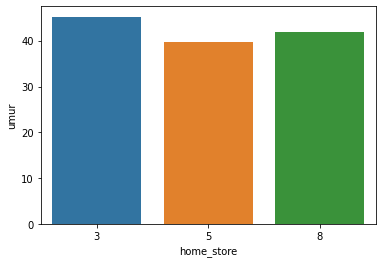

In [ ]:
#Plot rata-rata umur dimasing-masing store
sns.barplot(x="home_store", y="umur", data=df_group_umur)
plt.show()

2. Berapakah rata rata lama berlangganan (Length of stay) dari customer? dan tampilkan distribusi dari LOS tsb - Latihan

In [ ]:
#Langkah1.Extract kolom customer since ke dalam tahun
df_cust['day_los'] = (dt.now() - df_cust['customer_since']).dt.days
df_cust['los'] = df_cust['day_los']/365
df_cust

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,day_umur,umur,day_los,los
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,25983,71.0,1656,4.536986
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,25921,71.0,1653,4.528767
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,25859,70.0,1650,4.520548
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,25797,70.0,1647,4.512329
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,25735,70.0,1645,4.506849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977,15926,43.0,1654,4.531507
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000,7528,20.0,910,2.493151
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996,9175,25.0,1347,3.690411
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990,11462,31.0,1427,3.909589


In [ ]:
#Langkah2. Rata rata LOS untuk seluruh customer dalam tahun
df_cust['los'].mean()

3.4068224789275305

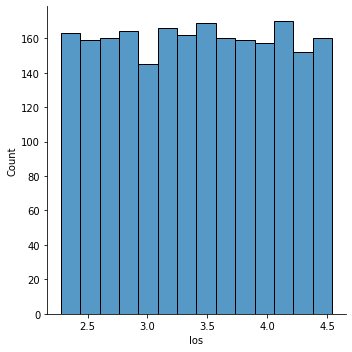

In [ ]:
#Langkah3. Distribusi plot (histogram) dari customer
sns.displot(data=df_cust, x="los")

3. Berapakah proporsi gender dari customer?

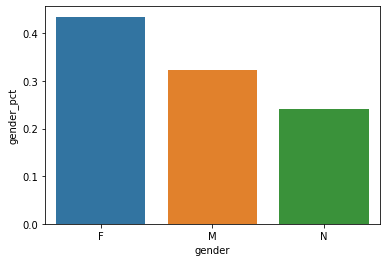

In [ ]:
df_group_cust = df_cust.groupby('gender')['customer_id'].count()
df_group_cust2 = (df_group_cust/df_group_cust.sum()).reset_index()
df_group_cust2.rename(columns = {'customer_id': 'gender_pct'}, inplace = True)

sns.barplot(data = df_group_cust2, x = 'gender', y = 'gender_pct')

4. Cek range tanggal transaksi, tampilkan table jumlah transaksi harian, lalu pada tanggal berapa transaksi terbanyak?

In [ ]:
df_trx.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,2021-07-18 12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,2021-07-18 15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,2021-07-18 14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,2021-07-18 16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,2021-07-18 19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [ ]:
# Langkah 1. Mengelompokkan transaksi berdasarkan tanggal
data_harian = df_trx.groupby('transaction_date')['customer_id'].size()
data_harian

transaction_date
2019-04-01    1657
2019-04-02    1638
2019-04-03    1683
2019-04-04    1591
2019-04-05    1634
2019-04-06    1465
2019-04-07    1693
2019-04-08    1846
2019-04-09    1757
2019-04-10    1798
2019-04-11    1707
2019-04-12    1681
2019-04-13    1829
2019-04-14    1733
2019-04-15    1835
2019-04-16    1897
2019-04-17    1809
2019-04-18    1844
2019-04-19    1907
2019-04-20    1780
2019-04-21    1688
2019-04-22    1665
2019-04-23    1686
2019-04-24    1815
2019-04-25    1689
2019-04-26    1715
2019-04-27    1852
2019-04-28    1532
2019-04-29    1468
Name: customer_id, dtype: int64

In [ ]:
# Langkah 3. Mengurutkan nilai 
data_harian.sort_values(ascending = False)

transaction_date
2019-04-19    1907
2019-04-16    1897
2019-04-27    1852
2019-04-08    1846
2019-04-18    1844
2019-04-15    1835
2019-04-13    1829
2019-04-24    1815
2019-04-17    1809
2019-04-10    1798
2019-04-20    1780
2019-04-09    1757
2019-04-14    1733
2019-04-26    1715
2019-04-11    1707
2019-04-07    1693
2019-04-25    1689
2019-04-21    1688
2019-04-23    1686
2019-04-03    1683
2019-04-12    1681
2019-04-22    1665
2019-04-01    1657
2019-04-02    1638
2019-04-05    1634
2019-04-04    1591
2019-04-28    1532
2019-04-29    1468
2019-04-06    1465
Name: customer_id, dtype: int64

In [ ]:
# Cara lainnya
# Mengelompokkan transaksi berdasarkan tanggal
df_trx.groupby('transaction_date')['customer_id'].size().sort_values(ascending = False)

transaction_date
2019-04-19    1907
2019-04-16    1897
2019-04-27    1852
2019-04-08    1846
2019-04-18    1844
2019-04-15    1835
2019-04-13    1829
2019-04-24    1815
2019-04-17    1809
2019-04-10    1798
2019-04-20    1780
2019-04-09    1757
2019-04-14    1733
2019-04-26    1715
2019-04-11    1707
2019-04-07    1693
2019-04-25    1689
2019-04-21    1688
2019-04-23    1686
2019-04-03    1683
2019-04-12    1681
2019-04-22    1665
2019-04-01    1657
2019-04-02    1638
2019-04-05    1634
2019-04-04    1591
2019-04-28    1532
2019-04-29    1468
2019-04-06    1465
Name: customer_id, dtype: int64

In [ ]:
data_harian = data_harian.reset_index()
data_harian.rename(columns={'customer_id':'jumlah customer'},inplace=True)
data_harian

,transaction_date,jumlah customer
0,2019-04-01,1657
1,2019-04-02,1638
2,2019-04-03,1683
3,2019-04-04,1591
4,2019-04-05,1634
5,2019-04-06,1465
6,2019-04-07,1693
7,2019-04-08,1846
8,2019-04-09,1757
9,2019-04-10,1798


In [ ]:
# Cek tipe data
data_harian.dtypes

transaction_date    datetime64[ns]
jumlah customer              int64
dtype: object

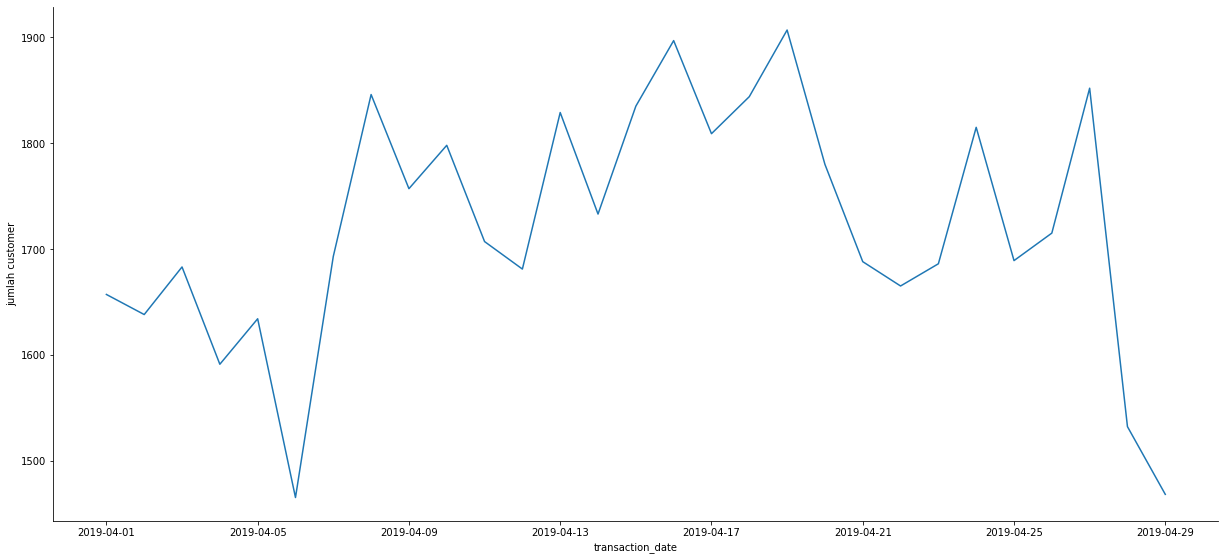

In [ ]:
# Plot
g=sns.relplot(x="transaction_date", y="jumlah customer", kind="line", data=data_harian)
g.fig.set_size_inches(20,8)

5. Berapakah Value transaksi / unit price customer berdasarkan (min, max, avg, std)?

In [ ]:
df_unitprice_cust = df_trx.groupby('customer_id')['unit_price'].sum().reset_index()
df_unitprice_cust['unit_price'].describe()

count     2248.000000
mean        75.121664
std       1823.951465
min          2.450000
25%         23.587500
50%         33.340000
75%         46.562500
max      86511.370000
Name: unit_price, dtype: float64